In [16]:
import time
import numpy as np
import pandas as pd
import pycountry as pc

from datetime import datetime, timedelta


import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


today = datetime.today()
day   = today.day if today.day > 9 else '0' + str(today.day)
month = today.month if today.month > 9 else '0' + str(today.month)
today_str = '{}/{}/{}'.format(day, month, today.year)

# Fetch data
monkeypox_df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv")

monkeypox_df['Gender'] = monkeypox_df['Gender'].str.strip().str.capitalize()
monkeypox_df['Confirmation_method'] = monkeypox_df['Confirmation_method'].str.replace('"','')

monkeypox_df.to_csv('monkeypox_df.csv', index = False)
# Omits all rows which are errors
monkeypox_df = monkeypox_df[monkeypox_df.Status != 'omit_error']

/var/folders/8q/v3dk0f4n0_7gh_vrjs_rxrbc0000gn/T/ipykernel_2185/3764810465.py:20: DtypeWarning: Columns (3,12,14,16,18,19,20,21,22,23,24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  monkeypox_df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv")


In [19]:
monkeypox_df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_death',
       'Date_last_modified'],
      dtype='object')

In [30]:
monkeypox_df.loc[monkeypox_df['Status'] == 'suspected'].shape

(2589, 36)

In [45]:
len(monkeypox_df[['Travel_history (Y/N/NA)']].isna())

54789

In [39]:
au_temp = monkeypox_df.loc[monkeypox_df['Country'] == 'Australia']
au_temp.groupby('Location').size()

Location
Australian Capital Territory      2
New South Wales                  47
New South Wales                   1
Queensland                        3
South Australia                   2
The Alfred Hospital, Victoria     1
Victoria                         60
Western Australia                 5
dtype: int64

In [34]:
usa_temp = monkeypox_df.loc[monkeypox_df['Country'] == 'United States']

In [73]:
usa_temp

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
35,N36,confirmed,"Massachusetts General Hospital, Boston, Massac...",Boston,United States,USA,NaN,Male,NaN,2022-05-18,...,https://www.mass.gov/news/massachusetts-public...,https://www.nbcboston.com/news/local/man-tests...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-08-12
100,N101,confirmed,"Bellevue Hospital, New York City, New York",NaN,United States,USA,20-69,Male,NaN,2022-05-19,...,https://twitter.com/nycHealthy/status/15274067...,https://www1.nyc.gov/assets/doh/downloads/pdf/...,https://www1.nyc.gov/assets/doh/downloads/pdf/...,NaN,NaN,NaN,NaN,2022-05-19,NaN,2022-07-19
192,N193,confirmed,"Broward County, Florida",NaN,United States,USA,NaN,NaN,NaN,2022-05-26,...,https://www.miamiherald.com/news/health-care/a...,https://www.floridahealth.gov/newsroom/2022/05...,NaN,NaN,NaN,NaN,NaN,2022-05-22,NaN,2022-05-26
243,N244,confirmed,"Salt Lake County, Utah",NaN,United States,USA,NaN,Male,NaN,2022-05-25,...,https://slco.org/health/Media/slcohd-announces...,https://www.sltrib.com/news/2022/05/25/monkeyp...,NaN,NaN,NaN,NaN,NaN,2022-05-23,NaN,2022-05-25
244,N245,confirmed,"Salt Lake County, Utah",NaN,United States,USA,NaN,Male,NaN,2022-05-25,...,https://slco.org/health/Media/slcohd-announces...,https://www.sltrib.com/news/2022/05/25/monkeyp...,NaN,NaN,NaN,NaN,NaN,2022-05-23,NaN,2022-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48337,N48338,confirmed,Michigan,NaN,United States,USA,NaN,NaN,NaN,2022-08-26,...,https://www.cdc.gov/poxvirus/monkeypox/respons...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,NaN,2022-08-26
48338,N48339,confirmed,Michigan,NaN,United States,USA,NaN,NaN,NaN,2022-08-26,...,https://www.cdc.gov/poxvirus/monkeypox/respons...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,NaN,2022-08-26
48339,N48340,confirmed,Michigan,NaN,United States,USA,NaN,NaN,NaN,2022-08-26,...,https://www.cdc.gov/poxvirus/monkeypox/respons...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,NaN,2022-08-26
48340,N48341,confirmed,Michigan,NaN,United States,USA,NaN,NaN,NaN,2022-08-26,...,https://www.cdc.gov/poxvirus/monkeypox/respons...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-26,NaN,2022-08-26


In [42]:
sum(monkeypox_df.Symptoms.isna())

51314

In [30]:
sum(monkeypox_df.Symptoms.notna())

203

In [31]:
sum(temp['Symptoms'].notnull())

152

In [6]:
sum(monkeypox_df['Country'].isna())

0

In [4]:
monkeypox_df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_death',
       'Date_last_modified'],
      dtype='object')

## Visualising Australian Data collectively and by state

In [30]:
import matplotlib.pyplot as plt

In [9]:
monkeypox_df.loc[monkeypox_df['Country'] == 'Australia']

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
106,N107,confirmed,New South Wales,Sydney,Australia,AUS,40-49,Male,NaN,2022-05-20,...,https://7news.com.au/news/public-health/austra...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-20,NaN,2022-05-20
107,N108,confirmed,"The Alfred Hospital, Victoria",Melbourne,Australia,AUS,30-39,Male,2022-05-08,2022-05-20,...,https://7news.com.au/news/public-health/warnin...,https://www.eurosurveillance.org/content/10.28...,NaN,NaN,NaN,NaN,NaN,2022-05-20,NaN,2022-06-30
950,N951,confirmed,New South Wales,Sydney,Australia,AUS,50-59,Male,NaN,2022-06-02,...,https://www1.racgp.org.au/newsgp/clinical/thir...,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-02,NaN,2022-06-02
1073,N1074,confirmed,New South Wales,Sydney,Australia,AUS,50-59,Male,NaN,2022-06-03,...,https://www.skynews.com.au/australia-news/four...,https://www.health.nsw.gov.au/news/Pages/20220...,https://www.channelnewsasia.com/singapore/monk...,NaN,NaN,NaN,NaN,2022-06-03,NaN,2022-06-07
1082,N1083,confirmed,Victoria,Melbourne,Australia,AUS,30-39,Male,NaN,2022-06-02,...,https://www.health.vic.gov.au/health-alerts/he...,https://www.abc.net.au/news/2022-06-03/second-...,https://www.health.vic.gov.au/health-alerts/he...,NaN,NaN,NaN,NaN,2022-06-03,NaN,2022-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51272,N51273,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-30,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-31,NaN,2022-08-31
51273,N51274,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-30,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-31,NaN,2022-08-31
51274,N51275,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-30,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-31,NaN,2022-08-31
51275,N51276,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-30,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-31,NaN,2022-08-31


In [14]:
def add_cases(df):
    for country in df['Country'].unique():
        temp = df.loc[df['Country'] == country]
        temp.groupby(['Date_confirmation']).size().plot()
    return

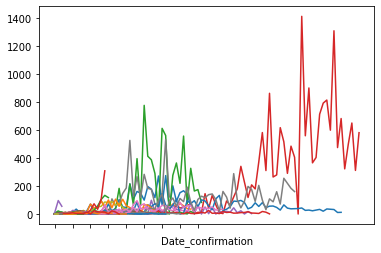

In [15]:
add_cases(monkeypox_df)

<AxesSubplot:xlabel='Date_confirmation'>

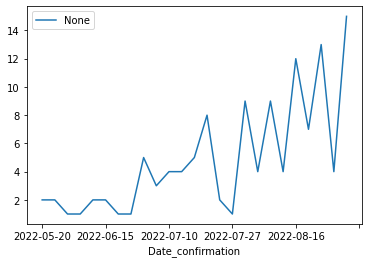

In [26]:
aus_mp = monkeypox_df.loc[monkeypox_df['Country'] == 'Australia']
aus_mp.groupby(['Date_confirmation']).size().plot(legend=True)

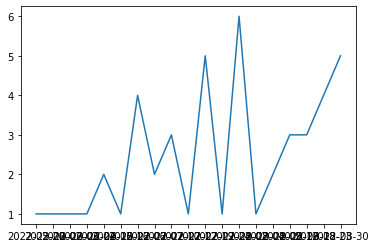

In [39]:
aus_data_current = pd.DataFrame({'cases' : aus_mp.groupby(['Date_confirmation', 'Location']).size()}).reset_index()
plt.plot(aus_data_current.loc[aus_data_current['Location'] == 'New South Wales', 'Date_confirmation'], aus_data_current.loc[aus_data_current['Location'] == 'New South Wales', 'cases'], label = "line 1", linestyle="-")

In [38]:
aus_data_current.loc[aus_data_current['Location'] == 'New South Wales']

,Date_confirmation,Location,cases
0,2022-05-20,New South Wales,1
2,2022-06-02,New South Wales,1
4,2022-06-03,New South Wales,1
5,2022-06-04,New South Wales,1
7,2022-06-15,New South Wales,2
8,2022-06-16,New South Wales,1
10,2022-07-06,New South Wales,4
12,2022-07-07,New South Wales,2
14,2022-07-10,New South Wales,3
17,2022-07-12,New South Wales,1


<AxesSubplot:xlabel='Date_confirmation'>

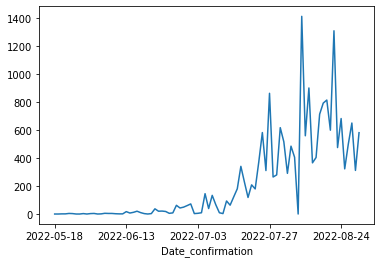

In [22]:
us_mp = monkeypox_df.loc[monkeypox_df['Country'] == 'United States']
us_mp.groupby(['Date_confirmation']).size().plot()

<AxesSubplot:xlabel='Date_confirmation'>

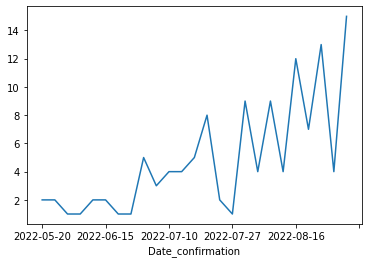

In [19]:
aus_mp.groupby(['Date_confirmation']).size().plot()

In [18]:
monkeypox_df.groupby(['Gender']).size()

Gender
Female      28
Male      2198
dtype: int64

In [65]:
monkeypox_df.Age.unique()

array([nan, '20-44', '30-59', '40-44', '25-29', '20-59', '30-34', '20-69',
       '20-64', '40-49', '30-39', '50-59', '35-39', '20-49', '15-74',
       '15-19', '15-39', '55-59', '45-49', '20-24', '30-50', '50-54',
       '10-14', '70-74', '15-64', '60-64', '65-69', '25-49', '40-45',
       '26-54', '5-9', '22-55', '30-54', '0-5', '30-49', '20-29', '40-42',
       '15-69', '20-50', '31-59', '45-50', '35-40', '50-55', '34-46',
       '20-62', '25-34', '35-44', '45-54', '55-64', '20-39', '36-50',
       '25-39', '19-24', '20-60', '23-46', '25-53', '51-65', '15-84',
       '20-35', '20-54', '1-69', '30-35', '20-65', '46-50', '20-25',
       '20-99', '20-46', '0-9', '24-29', '0-59', '25-44', '25-30',
       '15-20', '26-30', '22-59', '15-59', '0-49', '0-29', '22-43',
       '31-44', '0-14', '19-59', '0-39', '41-45'], dtype=object)

In [82]:
age_group =monkeypox_df.groupby(['Age', 'Gender']).size().sort_values()

In [83]:
age_group.to_csv('age_count_gender.csv')

In [2]:
aus_mp = monkeypox_df.loc[monkeypox_df['Country'] == 'Australia']
aus_mp.groupby(['Age']).size()

Age
30-39    4
40-49    1
50-59    2
dtype: int64

In [79]:
monkeypox_df.groupby(['Gender']).size()

Gender
Female      25
Male      2189
dtype: int64

In [86]:
monkeypox_df.groupby(['Country']).size().sort_values()

Country
Zambia               1
Montenegro           1
Malawi               1
Nepal                1
New Caledonia        1
                 ...  
England           3050
Germany           3266
Brazil            3829
Spain             5978
United States    14293
Length: 116, dtype: int64

In [3]:
def cases_by_age(df, country):
    return df.loc[monkeypox_df['Country'] == country].groupby(['Age']).size().sort_values()

In [105]:
monkeypox_df.loc[monkeypox_df['Country'] == 'Brazil'].groupby(['Age']).size().sort_values()

Age
15-19    1
20-24    1
20-29    1
25-39    1
30-39    1
35-39    2
50-54    2
20-39    3
23-46    5
40-44    7
30-34    8
25-29    9
dtype: int64

In [50]:
aus_mp.loc[aus_mp['Country'] == 'Australia'].groupby(['Location']).size()

Location
Australian Capital Territory      2
New South Wales                  38
New South Wales                   1
Northern Territory                1
Queensland                        3
South Australia                   2
The Alfred Hospital, Victoria     1
Victoria                         39
Western Australia                 3
dtype: int64

In [52]:
aus_mp['Symptoms'].unique()

array([nan, 'genital rash'], dtype=object)

In [57]:
monkeypox_df.loc[monkeypox_df['Country'] == 'United States'].groupby(['Gender']).size()

Gender
Female      1
Male      133
dtype: int64

In [40]:
aus_mp.loc[aus_mp['Country'] == 'Australia']

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
106,N107,confirmed,New South Wales,Sydney,Australia,AUS,40-49,Male,NaN,2022-05-20,...,https://7news.com.au/news/public-health/austra...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-20,NaN,2022-05-20
107,N108,confirmed,"The Alfred Hospital, Victoria",Melbourne,Australia,AUS,30-39,Male,2022-05-08,2022-05-20,...,https://7news.com.au/news/public-health/warnin...,https://www.eurosurveillance.org/content/10.28...,NaN,NaN,NaN,NaN,NaN,2022-05-20,NaN,2022-06-30
950,N951,confirmed,New South Wales,Sydney,Australia,AUS,50-59,Male,NaN,2022-06-02,...,https://www1.racgp.org.au/newsgp/clinical/thir...,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-02,NaN,2022-06-02
1073,N1074,confirmed,New South Wales,Sydney,Australia,AUS,50-59,Male,NaN,2022-06-03,...,https://www.skynews.com.au/australia-news/four...,https://www.health.nsw.gov.au/news/Pages/20220...,https://www.channelnewsasia.com/singapore/monk...,NaN,NaN,NaN,NaN,2022-06-03,NaN,2022-06-07
1082,N1083,confirmed,Victoria,Melbourne,Australia,AUS,30-39,Male,NaN,2022-06-02,...,https://www.health.vic.gov.au/health-alerts/he...,https://www.abc.net.au/news/2022-06-03/second-...,https://www.health.vic.gov.au/health-alerts/he...,NaN,NaN,NaN,NaN,2022-06-03,NaN,2022-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41265,N41266,confirmed,New South Wales,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-18,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
41266,N41267,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-18,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
41267,N41268,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-18,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
41268,N41269,confirmed,Victoria,NaN,Australia,AUS,NaN,NaN,NaN,2022-08-18,...,https://www.health.gov.au/health-alerts/monkey...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19


In [176]:
### ALL NESTED FUNCTIONS INTEGRATED FOR UMBRELLA TERM SYMPTOM SIMLIFICATION
# Function to check if simple term of lesion can be returned for a symptom
def lesion_class(item, dictionary, count, status):
    if 'lesion' in item.lower() or 'ulcer' in item.lower() or 'scab' in item.lower():
        status = True
        dictionary['lesion'] += count
    return dictionary, status
# Function to check if simple term of rash can be returned for a symptom
def rash_class(item, dictionary, count, status):
    if 'rash' in item.lower() or 'spots on skin' in item.lower():
        status = True
        dictionary['rash'] += count
    return dictionary, status
# Function to check if simple term of fever can be returned for a symptom
def fever_class(item, dictionary, count, status):
    if 'fever' in item.lower():
        status = True
        dictionary['fever'] += count
    return dictionary, status
# Function to check if simple term of blister can be returned for a symptom
def blister_class(item, dictionary, count, status):
    if 'blister' in item.lower() or 'vesicle' in item.lower():
        status = True
        dictionary['blister'] += count
    return dictionary, status
# Function to check if simple term of headache can be returned for a symptom
def headache_class(item, dictionary, count, status):
    if 'headache' in item.lower():
        status = True
        dictionary['headache'] += count 
    return dictionary, status
# Function to check if simple term of papule can be returned for a symptom
def papule_class(item, dictionary, count, status):
    if 'papule' in item.lower():
        status = True
        dictionary['papule'] += count
    return dictionary, status
# Function to check if simple term of pustule can be returned for a symptom
def pustule_class(item, dictionary, count, status):
    if 'pustule' in item.lower() or 'postule' in item.lower():
        status = True
        dictionary['pustule'] += count
    return dictionary, status
# Function to check if simple term of muscle ache can be returned for a symptom
def muscle_ache_class(item, dictionary, count, status):
    if 'myalgia' in item.lower() or 'muscle' in item.lower() or (('back' in item.lower() or 'joint' in item.lower() or 'body' in item.lower()) and 'pain' in item.lower()):
        status = True
        dictionary['muscle ache'] += count
    return dictionary, status
# Function to check if simple term of fatigue can be returned for a symptom
def fatigue_class(item, dictionary, count, status):
    if 'fatigue' in item.lower() or 'malaise' in item.lower():
        status = True
        dictionary['fatigue'] += count
    return dictionary, status
# Function to check if simple term of swollen lymph node can be returned for a symptom
def lymph_class(item, dictionary, count, status):
    if (('swollen' in item.lower() or 'swell' in item.lower()) and 'lymph' in item.lower()) or 'lymphadenopathy' in item.lower() or 'adenomegaly' in item.lower() or 'inguinal adenopathy' in item.lower() or ('enlarge' in item.lower() and 'lymph' in item.lower()):
        status = True
        dictionary['swollen lymph node'] += count
    return dictionary, status
# Function to check if characteristic symptoms adds to all items in the dictionary
def mp_class(item, dictionary, count, status):
    if 'symptoms' in item.lower() and 'monkeypox' in item.lower():
        status = True
        dictionary['lesion'] += count
        dictionary['rash'] += count
        dictionary['fever'] += count
        dictionary['blister'] += count
        dictionary['headache'] += count 
        dictionary['papule'] += count
        dictionary['pustule'] += count
        dictionary['muscle ache'] += count
        dictionary['fatigue'] += count
        dictionary['swollen lymph node'] += count
    return dictionary, status

In [179]:
def symp2dict(df):
    # Generates a dictionary with umbrella symptoms found via data exploration of raw data
    symp_dict = {'lesion': 0, 'rash': 0, 'fever':0, 'blister': 0, 'headache':0, 'papule':0, 'pustule':0, 'muscle ache':0, 'fatigue':0,'swollen lymph node':0}
    for indx in range(0, df.shape[0]):
        row = df.loc[indx, 'Symptoms'].split(',')
        case = df.loc[indx, 'case']
        for symp in row:
            status = False
            # Categorises symptoms based off common umbrella symptoms
            symp_dict, status = lesion_class(symp, symp_dict, case, status)
            symp_dict, status = rash_class(symp, symp_dict, case, status)
            symp_dict, status = fever_class(symp, symp_dict, case, status)
            symp_dict, status = blister_class(symp, symp_dict, case, status)
            symp_dict, status = headache_class(symp, symp_dict, case, status)
            symp_dict, status = papule_class(symp, symp_dict, case, status)
            symp_dict, status = pustule_class(symp, symp_dict, case, status)
            symp_dict, status = muscle_ache_class(symp, symp_dict, case, status)
            symp_dict, status = fatigue_class(symp, symp_dict, case, status)
            symp_dict, status = lymph_class(symp, symp_dict, case, status)
            symp_dict, status = mp_class(symp, symp_dict, case, status)
            # Adds any cases which are not classified under umbrella symptoms as their own case
            if status == False and symp.strip().lower() not in symp_dict.keys():
                symp_dict[symp.strip().lower()] = case
            elif status == False:
                symp_dict[symp.strip().lower()] += case
    return symp_dict
    

In [134]:
def symp2dict(df):
    symp_dict = dict()
    for indx in range(0, df.shape[0]):
        row = df.loc[indx, 'Symptoms'].split(',')
        case = df.loc[indx, 'case']
        for symp in row:
            if ';' in symp.lower():
                symp_1 = symp.split(";")
                for item in symp_1:
                    if 'lesion' in item.lower() or 'ulcer' in item.lower() or 'scab' in item.lower():
                        item = 'lesion'
                    elif 'rash' in item.lower() or 'spots on skin' in item.lower():
                        item = 'rash'
                    elif 'fever' in item.lower():
                        item = 'fever'
                    elif 'blister' in item.lower():
                        item = 'blister'
                    elif 'headache' in item.lower():
                        item = 'headache'
                    if item.strip() not in symp_dict.keys():
                        symp_dict[item.strip().lower()] = case
                    else:
                        symp_dict[item.strip().lower()] += case
            else:
                if 'lesion' in symp.lower() or 'ulcer' in symp.lower() or 'scab' in symp.lower():
                    symp = 'lesion'
                elif 'rash' in symp.lower() or 'spots on skin' in symp.lower():
                    symp = 'rash'
                elif 'fever' in symp.lower():
                    symp = 'fever'
                elif 'blister' in symp.lower():
                    symp = 'blister'
                elif 'headache' in symp.lower():
                    symp = 'headache'
                elif 'papule' in symp.lower():
                    symp = 'papule'
                if symp.strip() not in symp_dict.keys():
                    symp_dict[symp.strip().lower()] = case
                else:
                    symp_dict[symp.strip().lower()] += case
    return symp_dict

# Function to check if simple term of lesion can be returned for a symptom
def lesion_class(item):
    if 'lesion' in item.lower() or 'ulcer' in item.lower() or 'scab' in item.lower():
        return 'lesion'
# Function to check if simple term of rash can be returned for a symptom
def rash_class(item):
    if 'rash' in item.lower() or 'spots on skin' in item.lower():
        return 'rash'
# Function to check if simple term of fever can be returned for a symptom
def fever_class(item):
    if 'fever' in item.lower():
        return 'fever'
# Function to check if simple term of blister can be returned for a symptom
def blister_class(item):
    if 'blister' in item.lower():
        return 'blister'
# Function to check if simple term of headache can be returned for a symptom
def headache_class(item):
    if 'headache' in item.lower():
        return 'headache'
# Function to check if simple term of papule can be returned for a symptom
def papule_class(item):
    if 'papule' in item.lower():
        return 'papule'
# Function to check if simple term of pustule can be returned for a symptom
def pustule_class(item):
    if 'pustule' in item.lower():
        return 'pustule'
# Function to check if simple term of muscle ache can be returned for a symptom
def muscle_ache_class(item):
    if 'myalgia' in item.lower() or 'muscle' in item.lower():
        return 'muscle ache'
# Function to check if simple term of fatigue can be returned for a symptom
def fatigue_class(item):
    if 'fatigue' in item.lower() or 'malaise' in item.lower():
        return 'fatigue'
# Function to check if simple term of swollen lymph node can be returned for a symptom
def fatigue_class(item):
    if ('swollen' in item.lower() and 'lymph' in item.lower()) or 'lymphadenopathy' in item.lower() or 'adenomegaly' in item.lower() or 'inguinal adenopathy' in item.lower() or ('enlarge' in item.lower() and 'lymph' in item.lower()):
        return 'swollen lymph node'

In [191]:
# Finds symptoms experienced globally
mp_symptoms = pd.DataFrame({'case' : monkeypox_df.groupby(['Symptoms']).size()}).reset_index()
# Seperates each symptom with a ','
mp_symptoms['Symptoms'] = mp_symptoms['Symptoms'].str.lower()
# Total number of cases with symptoms
total_symptom_case = sum(mp_symptoms['case'])
# gets total number of cases for each symptom
symp_by_case = symp2dict(mp_symptoms)
del symp_by_case['hands']
del symp_by_case['and chest']
symp_df = pd.DataFrame(symp_by_case.items(), columns=['Symptoms', 'Cases'])
symp_df['percentage'] = symp_df['Cases']/total_symptom_case*100
symp_df.sort_values('percentage')
symp_df.to_csv('cleaned_symptoms.csv')

In [192]:
# Finds symptoms experienced globally
symp_df

,Symptoms,Cases,percentage
0,lesion,120,59.113300
1,rash,61,30.049261
2,fever,77,37.931034
3,blister,11,5.418719
4,headache,22,10.837438
5,papule,6,2.955665
6,pustule,9,4.433498
7,muscle ache,23,11.330049
8,fatigue,19,9.359606
9,swollen lymph node,12,5.911330
